In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [6]:
train = pd.read_csv("data/train_without_noise.csv", parse_dates=["timestamp"])
test = pd.read_csv("data/test.csv", parse_dates=["timestamp"])
macro = pd.read_csv("data/macro.csv", parse_dates=["timestamp"])

In [7]:
# join with macro data
train_macro = pd.merge(train, macro, how="left", on="timestamp")
test_macro = pd.merge(test, macro, how="left", on="timestamp")

In [21]:
train_macro = train_macro[np.append(macro.columns, ["price_doc", "id"])]
train_macro.set_index("id", inplace=True)

In [30]:
y_train = train_macro["price_doc"]
x_train = train_macro.drop(["timestamp", "price_doc", "child_on_acc_pre_school", "modern_education_share", "old_education_build_share"], axis=1).copy()

In [31]:
xgb_params = {
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "objective": "reg:linear",
    "eval_metric": "rmse",
    "silent": 1,
    "seed":42
}

In [33]:
dtrain = xgb.DMatrix(x_train.astype(np.float32), y_train.astype(np.float32))

In [34]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20, 
                   verbose_eval=50, show_stdv=False)

[0]	train-rmse:8.19558e+06	test-rmse:8.19619e+06
[50]	train-rmse:4.63588e+06	test-rmse:4.69877e+06


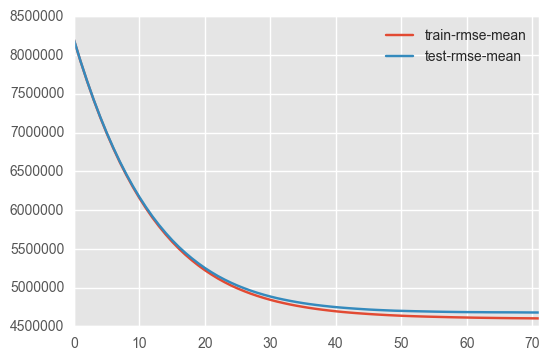

In [35]:
cv_output[["train-rmse-mean", "test-rmse-mean"]].plot()
pass

In [36]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

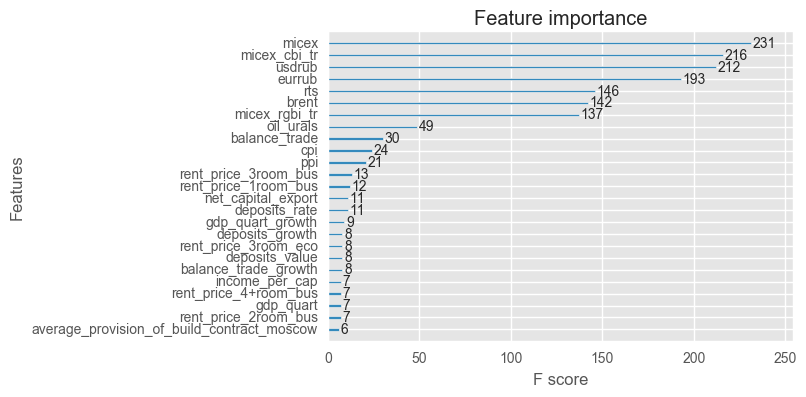

In [37]:
xgb.plot_importance(model, max_num_features=25)
pass

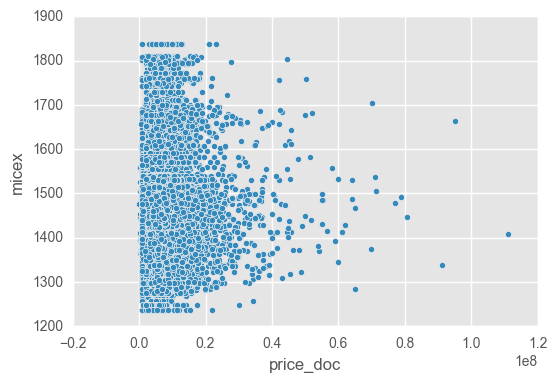

In [42]:
train_macro[["micex", "price_doc"]].plot(kind="scatter", y="micex", x="price_doc")

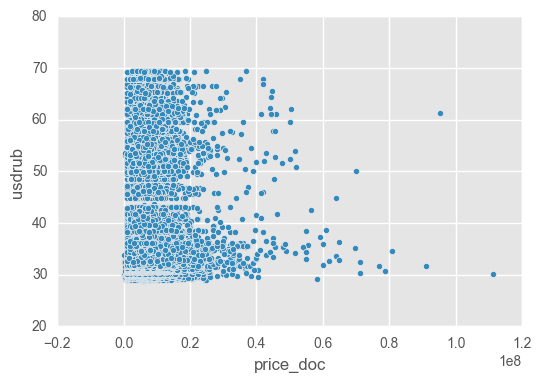

In [43]:
train_macro[["usdrub", "price_doc"]].plot(kind="scatter", y="usdrub", x="price_doc")

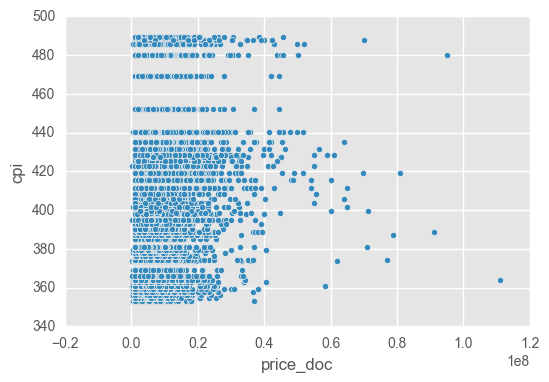

In [44]:
train_macro[["cpi", "price_doc"]].plot(kind="scatter", y="cpi", x="price_doc")